In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# import databaseconfig as cfg
from sqlalchemy import create_engine
import seaborn as sns

user = "postgres"
password = "Password1"
host = "localhost"
port = "5432"
db = "sql_homework"
url = f"postgresql://{user}:{password}@{host}:{port}/{db}"

# url = f"postgresql://{cfg.mysql[user]}:{cfg.mysql[passwd]}@{cfg.mysql[host]}:{cfg.mysql[port]}/{cfg.mysql[db]}"

engine = create_engine(url)
connection = engine.connect()

In [2]:
emp_df = pd.read_sql_query("SELECT * FROM employees", engine)
salary_df= pd.read_sql_query("SELECT * FROM salaries", engine)
emp_df

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [3]:
result=pd.merge(emp_df,
               salary_df,
               on="emp_no")
result=result.drop(["birth_date", "gender", "hire_date","from_date","to_date"], axis=1)
result.head()

,emp_no,first_name,last_name,salary
0,10001,Georgi,Facello,60117
1,10002,Bezalel,Simmel,65828
2,10003,Parto,Bamford,40006
3,10004,Chirstian,Koblick,40054
4,10005,Kyoichi,Maliniak,78228


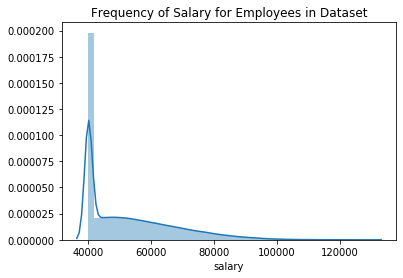

In [4]:
sns.distplot(result['salary'])
plt.title("Frequency of Salary for Employees in Dataset");

In [5]:
title_df= pd.read_sql_query("SELECT * FROM titles", engine)
title_df.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [6]:
result_2=pd.merge(result,
               title_df,
               on="emp_no")
result_2=result_2.drop(["from_date","to_date"], axis=1)
result_2.head()

,emp_no,first_name,last_name,salary,title
0,10001,Georgi,Facello,60117,Senior Engineer
1,10002,Bezalel,Simmel,65828,Staff
2,10003,Parto,Bamford,40006,Senior Engineer
3,10004,Chirstian,Koblick,40054,Engineer
4,10004,Chirstian,Koblick,40054,Senior Engineer


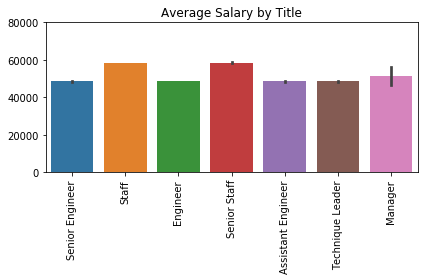

In [7]:
x=result_2["title"]
y=result_2["salary"]
ax = sns.barplot(x, y)
plt.xticks(rotation='vertical')
plt.title("Average Salary by Title")
plt.ylim(0, 80000)
ax.set_ylabel('')    
ax.set_xlabel('')
plt.tight_layout()